In [1]:
# Tim H 2024
# Video(s) that I followed along with for this Jupyter Notebook
# https://app.pluralsight.com/ilx/video-courses/4b4cdb5a-b0b9-4c17-8e5c-9d9e07e522a0/6890dda1-93e6-4d17-a91d-35d55fed4d46/6e43e874-3f95-4604-a967-f49769cc9661
# https://app.pluralsight.com/ilx/video-courses/4b4cdb5a-b0b9-4c17-8e5c-9d9e07e522a0/6890dda1-93e6-4d17-a91d-35d55fed4d46/b37bf402-ceed-4323-b994-d7c39dc75841

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

In [3]:
# https://www.kaggle.com/datasets/ash316/forbes-top-2000-companies
forbes_data = pd.read_csv('Forbes Top2000 2017.csv')
forbes_data.head()

,Unnamed: 0,Rank,Company,Country,Sales,Profits,Assets,Market Value,Sector,Industry
0,NaN,1,ICBC,China,151.4,42.0,3473.2,229.8,Financials,Major Banks
1,NaN,2,China Construction Bank,China,134.2,35.0,3016.6,200.5,Financials,Regional Banks
2,NaN,3,Berkshire Hathaway,United States,222.9,24.1,620.9,409.9,Financials,Investment Services
3,NaN,4,JPMorgan Chase,United States,102.5,24.2,2513.0,306.6,Financials,Major Banks
4,NaN,5,Wells Fargo,United States,97.6,21.9,1943.4,274.4,Financials,Major Banks


In [4]:
# see if there are any null values in the data set
forbes_data.isnull().sum()

Unnamed: 0      2000
 Rank              0
Company            0
Country            0
Sales              0
Profits            0
Assets             0
Market Value       0
Sector           197
Industry         491
dtype: int64

In [5]:
# drop the null values and verify they're gone
# GOTCHA: hadd to add the how and axis parameters
# otherwise it deleted ALL rows within the dataframe
# axis=0 # default, drops ROWS that contain missing values
# axis=1 # not default, drops COLUMNS that contain missing values
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
# how=any If any NA values are present, drop that row or column.
# how=all If all values are NA, drop that row or column.
# I also had to add the subset to manually specify which columns to include
# otherwise it didn't work
# The video was recorded in 2021 and probably used an older version of Pandas
forbes_data.dropna(how='any', subset=['Sector', 'Industry'], inplace=True)
forbes_data.isnull().sum()

Unnamed: 0      1508
 Rank              0
Company            0
Country            0
Sales              0
Profits            0
Assets             0
Market Value       0
Sector             0
Industry           0
dtype: int64

In [6]:
# display the dimensions of the table
# (rows, columsn)
forbes_data.shape

(1508, 10)

In [7]:
# calculate the mean
market_value_mean = forbes_data['Market Value'].mean()
market_value_mean

26.978494031830238

In [8]:
# calculate the median
market_value_med = forbes_data['Market Value'].median()
market_value_med

13.1

In [9]:
# getting the Mode
forbes_data['Sector'].value_counts()
# the most common Sector is Financials

Sector
Financials                    474
Consumer Discretionary        209
Industrials                   192
Materials                     145
Consumer Staples              106
Information Technology        103
Utilities                      86
Energy                         79
Health Care                    71
Telecommunication Services     43
Name: count, dtype: int64

In [10]:
sector_mode = forbes_data['Sector'].mode()
sector_mode

# normal for it to return a "0" leading the Financials

0    Financials
Name: Sector, dtype: object

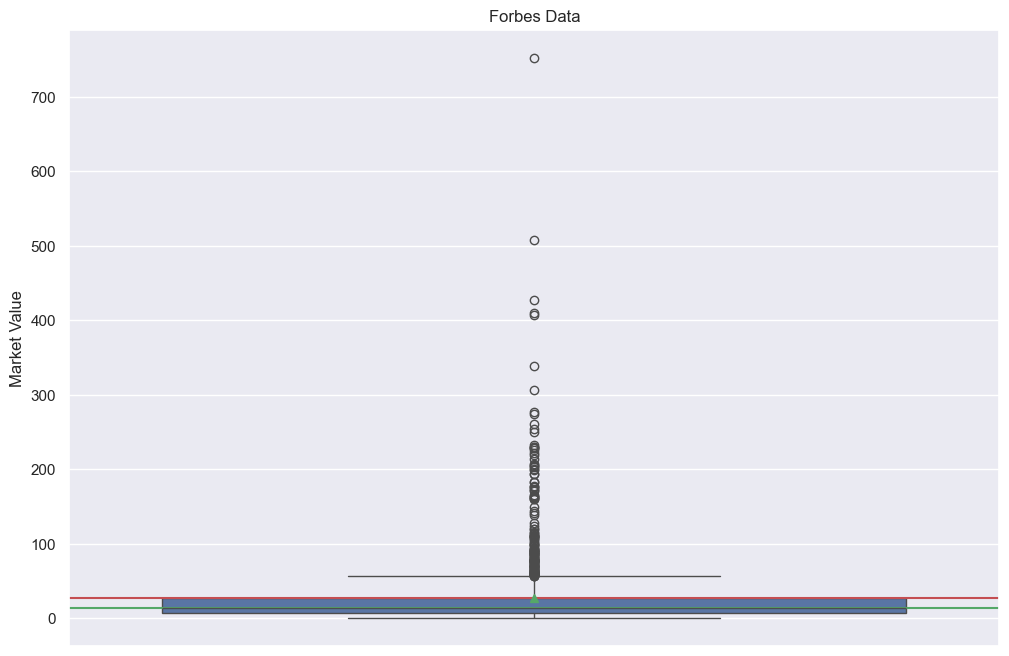

In [11]:
# plot all data in raw format
plt.figure(figsize=(12,8))

sns.boxplot(data=forbes_data, y='Market Value', showmeans=True)

plt.axhline(y=market_value_mean, color='r', linestyle='-')
plt.axhline(y=market_value_med, color='g', linestyle='-')

plt.title('Forbes Data')
plt.show()

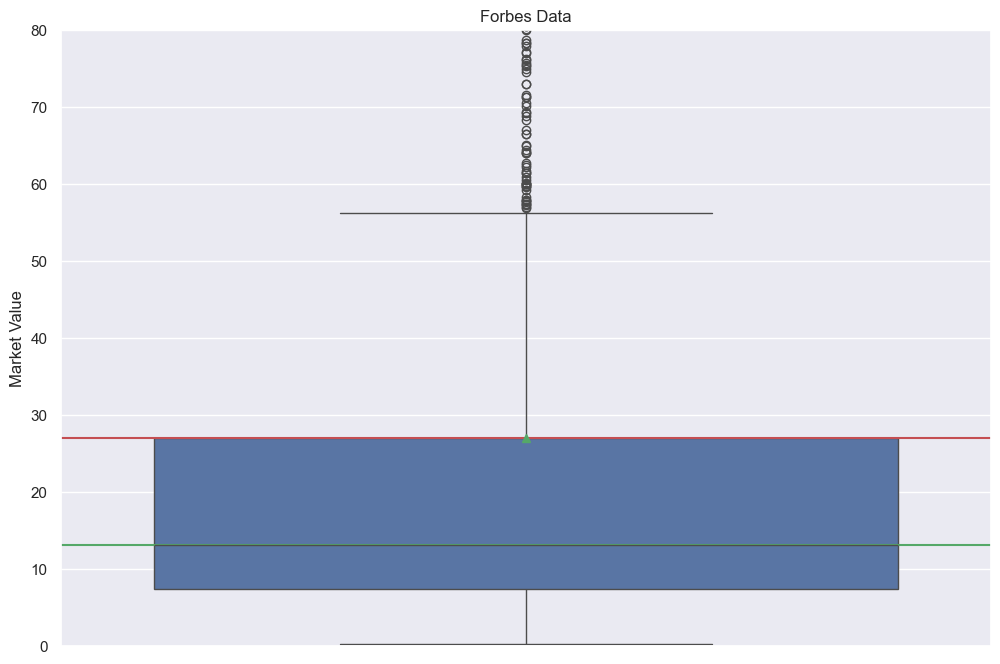

In [12]:
# There were a lot of outliers, so adding a new limitation on y-axis
plt.figure(figsize=(12,8))

sns.boxplot(data=forbes_data, y='Market Value', showmeans=True)

# addition:
plt.ylim(0,80)

plt.axhline(y=market_value_mean, color='r', linestyle='-')
plt.axhline(y=market_value_med, color='g', linestyle='-')

plt.title('Forbes Data')
plt.show()

In [13]:
# Maximum
prof_max = forbes_data['Profits'].max()

prof_max

45.2

In [14]:
# Minimum
prof_min = forbes_data['Profits'].min()

prof_min

-13.0

In [15]:
# surprisingly, there is not a .range() function
# have to calculate it manually
prof_range = prof_max - prof_min
prof_range

58.2

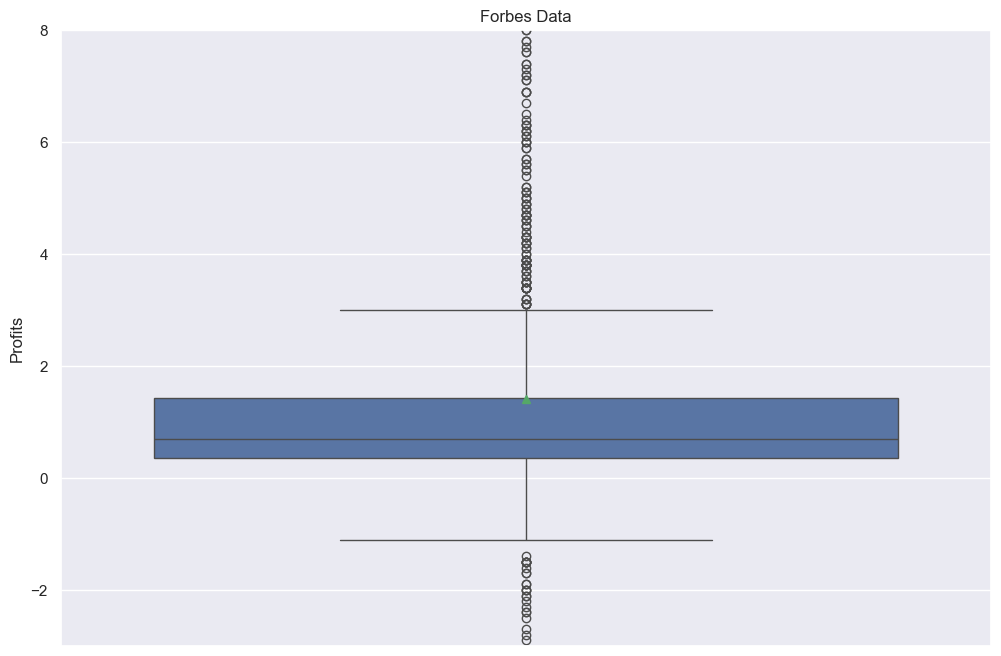

In [16]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=forbes_data, y='Profits', showmeans=True)

plt.title('Forbes Data')

# set limits
plt.ylim(-3, 8)

plt.show()

In [17]:
# first quartile percentile
Q1 = np.quantile(forbes_data['Profits'], 0.25)
Q1

0.34975

In [18]:
# first quartile percentile
Q3 = np.quantile(forbes_data['Profits'], 0.75)
Q3

1.4249999999999998

In [19]:
# inter quartile range from first to third quartile:
IQR = Q3 - Q1
IQR

1.0752499999999998

In [20]:
# Standard deviation
prof_std = forbes_data['Profits'].std()
prof_std

3.244201278603241

In [21]:
# Variance - the square of the standard deviation
prof_var = prof_std ** 2
prof_var

10.524841936090903

In [22]:
# directly computing the variance
prof_var = forbes_data['Profits'].var()
prof_var

10.524841936090903

In [23]:
# instead of computing all of these statistical values manually, you can just use .describe to calculate them for all
# columns that are numerical:

forbes_data.describe()

,Unnamed: 0,Rank,Sales,Profits,Assets,Market Value
count,0.0,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000
mean,NaN,909.135279,19.623046,1.407430,97.647016,26.978494
std,NaN,554.044456,30.875809,3.244201,287.036157,47.099541
min,NaN,1.000000,0.001000,-13.000000,1.300000,0.240000
25%,NaN,433.750000,4.900000,0.349750,12.800000,7.300000
50%,NaN,883.500000,10.300000,0.692500,25.900000,13.100000
75%,NaN,1354.250000,19.900000,1.425000,60.325000,26.900000
max,NaN,1999.000000,485.300000,45.200000,3473.200000,752.000000
